In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [2]:
#Loading the dataset into pandas framework
data = pd.read_csv('/content/drive/MyDrive/energy_consumption_india.csv')

In [3]:
#Convert the 'Dates' column to datetime
data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert errors to NaT for missing values

In [4]:
#Forward fill missing dates
data['Dates'] = data['Dates'].ffill()

In [5]:
#Set 'Dates' column as index
data.set_index('Dates', inplace=True)

In [6]:
#Drop unnecessary columns
data.drop(['States', 'Regions', 'latitude', 'longitude'], axis=1, inplace=True)

In [7]:
#Resample data to monthly frequency and sum the energy consumption
data = data.groupby(pd.Grouper(freq='M')).sum()


In [8]:
#Splitting the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [9]:
#Define and fit the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Seasonal order for monthly data
model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [10]:
#Forecast for the next 4 years (48 months)
forecast = result.get_forecast(steps=48)

In [11]:
#Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()

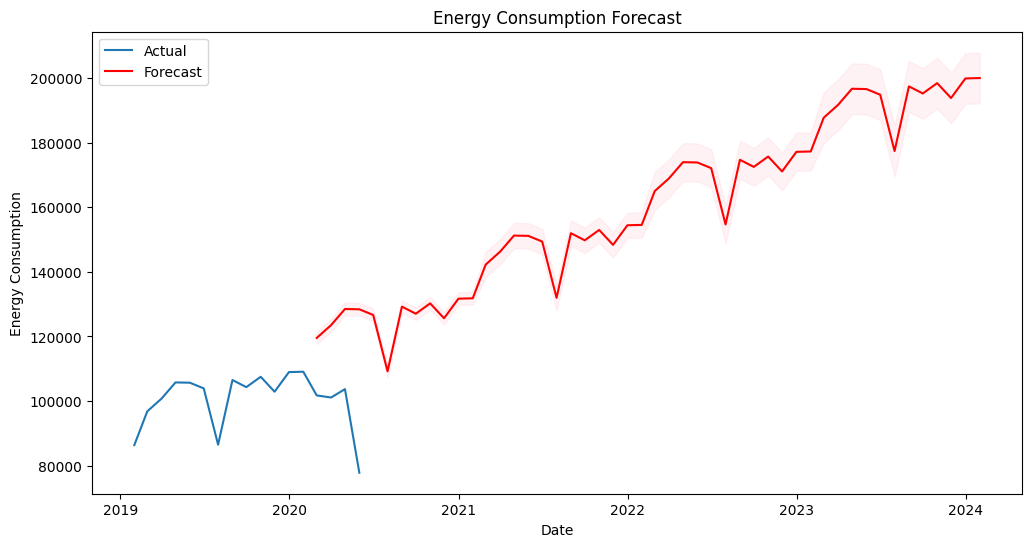

For the next year, the average energy consumption for India is forecasted to be approximately 194102.54 units.


In [16]:
#Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast')
plt.legend()
plt.show()

#Explain the forecast
forecast_mean_next_year = forecast.predicted_mean[-12:].mean()
print(f"For the next year, the average energy consumption for India is forecasted to be approximately {forecast_mean_next_year:.2f} units.")

In [55]:
#Evaluate the model
mse = mean_squared_error(test, forecast.predicted_mean[-len(test):])
print('Mean Squared Error:', mse)

Mean Squared Error: 10518123950.294994
